In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from config import gkey
from scipy.stats import linregress

In [2]:
#read census poverty data
poverty_df = pd.read_csv('2007_2016_poverty.csv')

In [3]:
poverty_df.head()

,Year,State,County ID,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Count LB 90%,All Ages in Poverty Count UB 90%,90% Confidence Interval (All Ages in Poverty Count),All Ages in Poverty Percent,...,Under Age 5 in Poverty Count UB 90%,90% Confidence Interval (Under Age 5 in Poverty Count),Under Age 5 in Poverty Percent,Under Age 5 in Poverty Percent LB 90%,Under Age 5 in Poverty Percent UB 90%,90% Confidence Interval (Under Age 5 in Poverty Percent),Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%,90% Confidence Interval (Median Household Income in Dollars)
0,2016,1,1001,Autauga County (AL),"54,939","7,444","6,255","8,633","6,255 to 8,633",13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,"$54,487","$50,886","$58,088","$50,886 to $58,088"
1,2015,1,1001,Autauga County (AL),"54,860","6,966","5,673","8,259","5,673 to 8,259",12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,"$56,580","$51,459","$61,701","$51,459 to $61,701"
2,2014,1,1001,Autauga County (AL),"54,903","7,204","5,845","8,563","5,845 to 8,563",13.1,...,NaN,NaN,NaN,NaN,NaN,NaN,"$54,366","$50,916","$57,816","$50,916 to $57,816"
3,2013,1,1001,Autauga County (AL),"54,762","7,397","6,109","8,685","6,109 to 8,685",13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,"$51,868","$48,314","$55,422","$48,314 to $55,422"
4,2012,1,1001,Autauga County (AL),"55,059","7,017","5,688","8,346","5,688 to 8,346",12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,"$51,441","$47,185","$55,697","$47,185 to $55,697"


In [4]:
#only keep needed columns
poverty_df = poverty_df[["Year","County ID","State / County Name","All Ages in Poverty Percent"]]

In [5]:
poverty_df.head()

,Year,County ID,State / County Name,All Ages in Poverty Percent
0,2016,1001,Autauga County (AL),13.5
1,2015,1001,Autauga County (AL),12.7
2,2014,1001,Autauga County (AL),13.1
3,2013,1001,Autauga County (AL),13.5
4,2012,1001,Autauga County (AL),12.7


In [6]:
#group by the County ID
poverty_group = poverty_df.groupby(["County ID"]).mean()

In [7]:
poverty_group.head()

,Year,All Ages in Poverty Percent
County ID,,
1001,2011.5,12.46
1003,2011.5,12.59
1005,2011.5,28.27
1007,2011.5,20.29
1009,2011.5,15.19


In [8]:
#read table of lat/lng cooridnates for counties
location_df = pd.read_csv('2017_counties.csv', encoding="ISO-8859-1")

In [9]:
location_df = location_df.rename(columns={'GEOID': "County ID","INTPTLAT": "Lat","INTPTLONG": "Lng"})

In [10]:
location_df.head()

,USPS,County ID,NAME,Lat,Lng
0,AL,1001,Autauga County,32.532237,-86.646440
1,AL,1003,Baldwin County,30.659218,-87.746067
2,AL,1005,Barbour County,31.870253,-85.405104
3,AL,1007,Bibb County,33.015893,-87.127148
4,AL,1009,Blount County,33.977358,-86.566440


In [11]:
#combine poverty data with county location data
merge_table = pd.merge(poverty_df, location_df, on="County ID", how="left")

In [12]:
merge_table.head()

,Year,County ID,State / County Name,All Ages in Poverty Percent,USPS,NAME,Lat,Lng
0,2016,1001,Autauga County (AL),13.5,AL,Autauga County,32.532237,-86.64644
1,2015,1001,Autauga County (AL),12.7,AL,Autauga County,32.532237,-86.64644
2,2014,1001,Autauga County (AL),13.1,AL,Autauga County,32.532237,-86.64644
3,2013,1001,Autauga County (AL),13.5,AL,Autauga County,32.532237,-86.64644
4,2012,1001,Autauga County (AL),12.7,AL,Autauga County,32.532237,-86.64644


In [13]:
#group by County ID
merge_group = merge_table.groupby(["County ID"]).mean()

In [14]:
merge_group.head()

,Year,All Ages in Poverty Percent,Lat,Lng
County ID,,,,
1001,2011.5,12.46,32.532237,-86.646440
1003,2011.5,12.59,30.659218,-87.746067
1005,2011.5,28.27,31.870253,-85.405104
1007,2011.5,20.29,33.015893,-87.127148
1009,2011.5,15.19,33.977358,-86.566440


In [15]:
#remove rows with missing values
merge_group = merge_group.dropna(how="any")

In [16]:
merge_group.head()

,Year,All Ages in Poverty Percent,Lat,Lng
County ID,,,,
1001,2011.5,12.46,32.532237,-86.646440
1003,2011.5,12.59,30.659218,-87.746067
1005,2011.5,28.27,31.870253,-85.405104
1007,2011.5,20.29,33.015893,-87.127148
1009,2011.5,15.19,33.977358,-86.566440


In [17]:
#load API key
gmaps.configure(api_key=gkey)

In [18]:
#construct heat map of poverty levels from 2007-2016
locations = merge_group[["Lat", "Lng"]].astype(float)
poverty_rate = merge_group["All Ages in Poverty Percent"].astype(float)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = .7)

In [19]:
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
#read CDC data on top 15 states for infant death rates
death_rates_state_top_df = pd.read_csv('death_rates_state_top.csv')

In [21]:
death_rates_state_top_df

,State,State Code,Deaths,Births,Death Rate,Lat,Lng
0,Mississippi,28,3823,406596,9.40,32.741646,-89.678696
1,Alabama,1,5349,606074,8.83,32.806671,-86.791130
2,District of Columbia,11,812,93126,8.72,38.897438,-77.026817
3,Louisiana,22,5287,639021,8.27,31.169546,-91.867805
4,Delaware,10,886,113424,7.81,39.318523,-75.507141
5,Oklahoma,40,4044,535082,7.56,35.565342,-96.928917
6,Arkansas,5,2950,390960,7.55,34.969704,-92.373123
7,North Carolina,37,9279,1232890,7.53,35.630066,-79.806419
8,Ohio,39,10648,1415822,7.52,40.388783,-82.764915
9,Tennessee,47,6140,818022,7.51,35.747845,-86.692345


In [22]:
#drop location markers on the 15 states
locations_state = death_rates_state_top_df[["Lat", "Lng"]].astype(float)
state_layer = gmaps.symbol_layer(
    locations_state, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=4)

#state_layer.markers[10].scale=20



fig = gmaps.figure()
fig.add_layer(state_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
#combine poverty heatmap with state location
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(state_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
#read CDC data on death rates per county for 2006-2017
death_rates_county = pd.read_csv('death_rates.csv')

In [25]:
death_rates_county

,County,County Code,Deaths,Births,Death Rate
0,"Jefferson County, AL",1073,983,91579,10.73
1,"Madison County, AL",1089,332,41740,7.95
2,"Mobile County, AL",1097,512,57785,8.86
3,"Unidentified Counties, AL",1999,3522,414970,8.49
4,"Anchorage Borough, AK",2020,234,46436,5.04
5,"Unidentified Counties, AK",2999,406,66825,6.08
6,"Maricopa County, AZ",4013,3291,567145,5.80
7,"Pima County, AZ",4019,700,122981,5.69
8,"Pinal County, AZ",4021,79,13412,5.89
9,"Unidentified Counties, AZ",4999,1253,193502,6.48


In [26]:
death_rates_county = death_rates_county.rename(columns={"County Code": "County ID"})

In [27]:
death_rates_county.head()

,County,County ID,Deaths,Births,Death Rate
0,"Jefferson County, AL",1073,983,91579,10.73
1,"Madison County, AL",1089,332,41740,7.95
2,"Mobile County, AL",1097,512,57785,8.86
3,"Unidentified Counties, AL",1999,3522,414970,8.49
4,"Anchorage Borough, AK",2020,234,46436,5.04


In [28]:
#merge CDC data on death rates per county with poverty and county location data
regress_df = pd.merge(death_rates_county, merge_group, on="County ID", how="left")

In [29]:
regress_df

,County,County ID,Deaths,Births,Death Rate,Year,All Ages in Poverty Percent,Lat,Lng
0,"Jefferson County, AL",1073,983,91579,10.73,2011.5,17.30,33.553444,-86.896536
1,"Madison County, AL",1089,332,41740,7.95,2011.5,12.69,34.764238,-86.551080
2,"Mobile County, AL",1097,512,57785,8.86,2011.5,19.71,30.684572,-88.196568
3,"Unidentified Counties, AL",1999,3522,414970,8.49,NaN,NaN,NaN,NaN
4,"Anchorage Borough, AK",2020,234,46436,5.04,2011.5,8.35,61.174250,-149.284329
5,"Unidentified Counties, AK",2999,406,66825,6.08,NaN,NaN,NaN,NaN
6,"Maricopa County, AZ",4013,3291,567145,5.80,2011.5,15.88,33.346541,-112.495534
7,"Pima County, AZ",4019,700,122981,5.69,2011.5,18.22,32.128523,-111.783027
8,"Pinal County, AZ",4021,79,13412,5.89,2011.5,15.52,32.918538,-111.366387
9,"Unidentified Counties, AZ",4999,1253,193502,6.48,NaN,NaN,NaN,NaN


In [30]:
#remove all rows with missing values
regress_df = regress_df.dropna(how="any")

In [31]:
regress_df

,County,County ID,Deaths,Births,Death Rate,Year,All Ages in Poverty Percent,Lat,Lng
0,"Jefferson County, AL",1073,983,91579,10.73,2011.5,17.30,33.553444,-86.896536
1,"Madison County, AL",1089,332,41740,7.95,2011.5,12.69,34.764238,-86.551080
2,"Mobile County, AL",1097,512,57785,8.86,2011.5,19.71,30.684572,-88.196568
4,"Anchorage Borough, AK",2020,234,46436,5.04,2011.5,8.35,61.174250,-149.284329
6,"Maricopa County, AZ",4013,3291,567145,5.80,2011.5,15.88,33.346541,-112.495534
7,"Pima County, AZ",4019,700,122981,5.69,2011.5,18.22,32.128523,-111.783027
8,"Pinal County, AZ",4021,79,13412,5.89,2011.5,15.52,32.918538,-111.366387
10,"Pulaski County, AR",5119,473,57015,8.30,2011.5,17.10,34.770311,-92.312996
12,"Alameda County, CA",6001,845,198592,4.25,2011.5,11.97,37.647139,-121.912488
13,"Contra Costa County, CA",6013,524,125438,4.18,2011.5,10.01,37.919479,-121.951543


In [32]:
#define x and y axis for regression analsys
x_axis = regress_df["All Ages in Poverty Percent"]
y_axis = regress_df["Death Rate"]

In [33]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

In [34]:
#calculate statistical values
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)

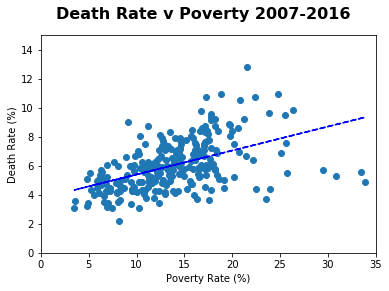

In [35]:
#perform linear regression of death rate versus poverty
fig, ax = plt.subplots()

fig.suptitle("Death Rate v Poverty 2007-2016", fontsize=16, fontweight="bold")

ax.set_xlim(0,35)
ax.set_ylim(0,15)

ax.set_xlabel("Poverty Rate (%)")
ax.set_ylabel("Death Rate (%)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [36]:
p_value

9.850728813612898e-18

In [37]:
help(gmaps.symbol_layer)

Help on function symbol_layer in module gmaps.marker:

symbol_layer(locations, hover_text='', fill_color=None, fill_opacity=1.0, stroke_color=None, stroke_opacity=1.0, scale=3, info_box_content=None, display_info_box=None)
    Symbol layer
    
    Add this layer to a :class:`gmaps.Figure` instance to draw
    symbols on the map. A symbol will be drawn on the map for
    each point in the ``locations`` argument.
    
    :Examples:
    
    >>> fig = gmaps.figure()
    >>> locations = [
            (-34.0, -59.166672),
            (-32.23333, -64.433327),
            (40.166672, 44.133331),
            (51.216671, 5.0833302),
            (51.333328, 4.25)
        ]
    >>> symbols = gmaps.symbol_layer(
            locations, fill_color='red', stroke_color='red')
    >>> fig.add_layer(symbols)
    
    You can set a list of information boxes, which will be displayed when the
    user clicks on a marker.
    
    >>> list_of_infoboxes = [
            'Simple string info box',
           

In [38]:
#start health insurance analysis
insurance_df = pd.read_csv("insurance.csv")

In [39]:
insurance_df.head()

,State,Year,Total,Private,Public
0,Alabama,2017.0,96.9,55.0,45.8
1,Alabama,2016.0,97.3,55.8,44.8
2,Alabama,2015.0,96.8,55.9,45.0
3,Alabama,2014.0,95.8,55.2,44.4
4,Alabama,2013.0,95.2,55.5,43.6


In [40]:
death_rates_state = pd.read_csv("death_rates_state.txt", delimiter="\t")

In [41]:
death_rates_state = death_rates_state[["State","Death Rate"]]

In [42]:
death_rates_state = death_rates_state.dropna(how="any")

In [43]:
death_rates_state.head()

,State,Death Rate
0,Alabama,8.83
1,Alaska,5.65
2,Arizona,5.93
3,Arkansas,7.55
4,California,4.71


In [45]:
insurance_group = insurance_df.groupby("State").mean()

In [46]:
insurance_group.head()

,Year,Total,Private,Public
State,,,,
Alabama,2012.5,95.16,56.93,41.90
Alaska,2012.5,87.96,60.11,32.79
Arizona,2012.5,88.46,54.97,36.96
Arkansas,2012.5,93.89,47.87,49.89
California,2012.5,92.96,56.08,40.19


In [47]:
insurance_merge = pd.merge(death_rates_state, insurance_group, on="State", how="left")

In [48]:
insurance_merge.head()

,State,Death Rate,Year,Total,Private,Public
0,Alabama,8.83,2012.5,95.16,56.93,41.90
1,Alaska,5.65,2012.5,87.96,60.11,32.79
2,Arizona,5.93,2012.5,88.46,54.97,36.96
3,Arkansas,7.55,2012.5,93.89,47.87,49.89
4,California,4.71,2012.5,92.96,56.08,40.19


In [49]:
x_axis = insurance_merge["Total"]
y_axis = insurance_merge["Death Rate"]

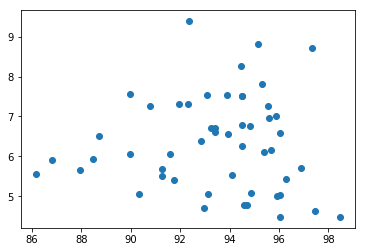

In [50]:
plt.scatter(x_axis, y_axis)

In [51]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)

In [52]:
p_value

0.9836866811526419

In [53]:
x2_axis = insurance_merge["Public"]

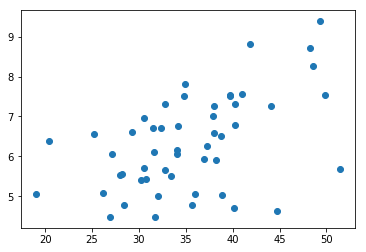

In [54]:
plt.scatter(x2_axis, y_axis)

In [55]:
insurance_merge = insurance_merge.dropna(how="any")

In [56]:
insurance_merge.dtypes

State          object
Death Rate    float64
Year          float64
Total         float64
Private       float64
Public        float64
dtype: object

In [57]:
(slope, intercept, _, _, _) = linregress(x2_axis, y_axis)
fit = slope * x2_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x2_axis, y_axis)

In [58]:
p_value

0.00018406689781009939

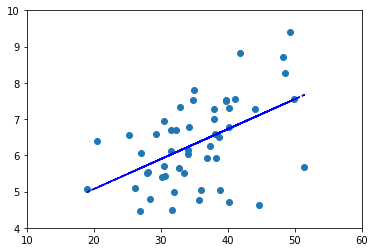

In [59]:
(slope, intercept, _, _, _) = linregress(x2_axis, y_axis)
fit = slope * x2_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x2_axis, y_axis)

fig, ax = plt.subplots()

fig.suptitle("", fontsize=16, fontweight="bold")

ax.set_xlim(10,60)
ax.set_ylim(4,10)

# ax.set_xlabel("Poverty Rate (%)")
# ax.set_ylabel("Death Rate (%)")

ax.plot(x2_axis, y_axis, linewidth=0, marker='o')
ax.plot(x2_axis, fit, 'b--')

plt.show()


In [60]:
x3_axis = insurance_merge["Private"]

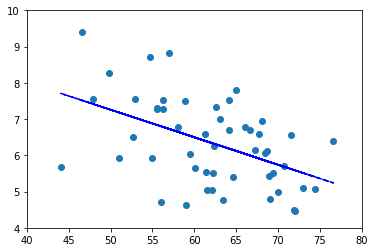

In [62]:
(slope, intercept, _, _, _) = linregress(x3_axis, y_axis)
fit = slope * x3_axis + intercept
slope, intercept, r_value, p_value, std_err = linregress(x3_axis, y_axis)

fig, ax = plt.subplots()

fig.suptitle("", fontsize=16, fontweight="bold")

ax.set_xlim(40,80)
ax.set_ylim(4,10)

# ax.set_xlabel("Poverty Rate (%)")
# ax.set_ylabel("Death Rate (%)")

ax.plot(x3_axis, y_axis, linewidth=0, marker='o')
ax.plot(x3_axis, fit, 'b--')

plt.show()


In [63]:
p_value

0.0003313122078554712